<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Grundlagen Programmierung</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2023</b></font></div>
        </td>
    </tr>
</table>

---

# 7 Python Pakete



## Genau Integration

https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [353]:
https://tespy.readthedocs.io/en/main/basics/intro.html

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Schreibe eine Funktion, die das Elektrofahrzeug immer dann wenn der SoC unter 25% oder sobald mehr PV-Strom erzeugt wird als das Gebäude verbraucht und nur zurück gibt, ob geladen wird oder nicht.

In [344]:
def charge_bev(bev_connection, soc, pv_generation_kWh, consumption_kWh):
    charge  = False

    if bev_connection == False:
        return False
    elif soc < 10 or pv_generation_kWh > consumption_kWh:
        return True
    else:
        return False

In [345]:
# Testen der Funktion
charge_bev(bev_connection = True, soc = 50, pv_generation_kWh = 20, consumption_kWh = 10)

True

Schreibe eine Funktion, die die Ladegeschwindigkeit des Fahrzeuges bestimmt. 

In [346]:
def charge_bev_speed(charge, soc, max_soc, pv_generation_kWh,consumption_kWh):
    capacity_left = max_soc - soc
    #print(capacity_left)
    if charge == False:
        return 0
    elif soc < 10:
        return 11
    else:     
        return max(0, min(capacity_left, pv_generation_kWh - consumption_kWh))


In [347]:
# Testen der Funktion
charge_bev_speed(charge = True, soc = 70 , max_soc = 75, pv_generation_kWh = 20 ,consumption_kWh = 10)

5

In [348]:
charge = []
charging_speed_kWh = []

for index, time in enumerate(timestamps):
    #print(index)
    charge.append(charge_bev(bev_connection[index], bev_soc_kWh[index],pv_generation_kWh[index], consumption_kWh[index]))
    current_charging_speed_kWh = charge_bev_speed(charge[index],bev_soc_kWh[index-1], bev_max_soc_kWh,pv_generation_kWh[index], consumption_kWh[index])
    charging_speed_kWh.append(current_charging_speed_kWh)
    bev_soc_kWh[index] = bev_soc_kWh[index-1] + current_charging_speed_kWh
#charge
#charging_speed_kWh
#bev_soc_kWh

In [349]:
bev_soc_kWh

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 11.        , 12.69963929,
       14.77145379, 19.43713634, 19.43713634, 19.43713634, 19.43713634,
       19.43713634, 19.43713634, 19.43713634, 19.43713634])

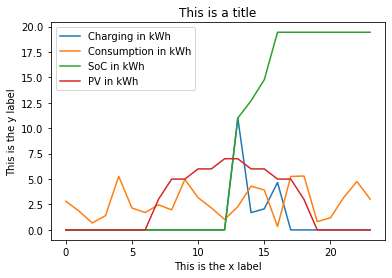

In [350]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plottet die Daten
plt.plot(steps, charging_speed_kWh)
plt.plot(steps, consumption_kWh)
plt.plot(steps, bev_soc_kWh)
plt.plot(steps, pv_generation_kWh)
# Integriert einen Titel
plt.title("This is a title")

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("This is the x label")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("This is the y label")

# Integriert die Legende
plt.legend(['Charging in kWh','Consumption in kWh', 'SoC in kWh', 'PV in kWh'])


In [357]:
import pandas as pd
all_data = {    "consumption_kWh" : consumption_kWh,
                "charging_speed_kWh" : charging_speed_kWh,
                "bev_soc_kWh" : bev_soc_kWh,
                "pv_generation_kWh" : pv_generation_kWh,
                "timestamps" : timestamps 

}
dataframe = pd.DataFrame(all_data)
dataframe.head()

,consumption_kWh,charging_speed_kWh,bev_soc_kWh,pv_generation_kWh,timestamps
0,3.229623,0.0,0.0,0.0,2023-07-17 00:00:00
1,4.508023,0.0,0.0,0.0,2023-07-17 01:00:00
2,4.799760,0.0,0.0,0.0,2023-07-17 02:00:00
3,1.456806,0.0,0.0,0.0,2023-07-17 03:00:00
4,2.044882,0.0,0.0,0.0,2023-07-17 04:00:00


In [358]:
dataframe.to_csv("results.csv")

In [359]:
dataframe.describe()

,consumption_kWh,charging_speed_kWh,bev_soc_kWh,pv_generation_kWh
count,24.000000,24.000000,24.000000,24.000000
mean,3.368432,0.809881,8.082008,2.666667
std,1.887802,2.415602,9.220116,2.869126
min,0.184349,0.000000,0.000000,0.000000
25%,1.702510,0.000000,0.000000,0.000000
50%,3.656753,0.000000,0.000000,1.500000
75%,4.837697,0.000000,19.437136,5.250000
max,5.958227,11.000000,19.437136,7.000000
